In [ ]:
 
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten, Dropout
from tensorflow.keras.activations import relu,sigmoid
 
(x_train, y_train), (x_test, y_test)=mnist.load_data( )
x_train=(x_train/255).reshape((-1,28,28,1))
x_test=(x_test/255).reshape((-1,28,28,1))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
 
m=Sequential()
m.add(Conv2D(8,(3,3),activation='relu',input_shape=(28,28,1)))
m.add(Dropout(0.2))
m.add(MaxPooling2D())
m.add(Conv2D(16,(3,3),activation='relu'))
m.add(Dropout(0.3))
m.add(MaxPooling2D())
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.compile('adam','categorical_crossentropy',metrics=['accuracy'])
m.summary()
m.fit(x_train,y_train,epochs=5)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_16 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
dropout_17 (Dropout)         (None, 11, 11, 16)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)              

In [ ]:
(uy,hfy), (__, y_test)=mnist.load_data( )
e=m.predict_classes(x_test)
e.shape,y_test.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


((10000,), (10000,))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



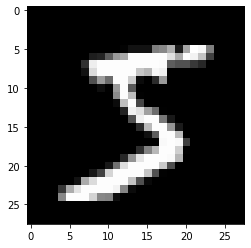

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,e))
plt.imshow(x_train[0].reshape((28,28)),cmap='gray')

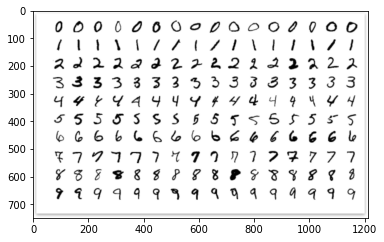

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


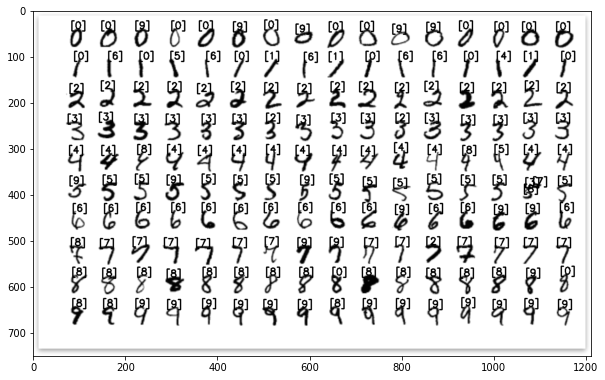

In [ ]:
a=cv2.imread("/content/num.png")
plt.imshow(a)
plt.show()
a=cv2.cvtColor(a,cv2.COLOR_RGB2GRAY)
cc=a.copy()
_,a1=cv2.threshold(a,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
v=cv2.findContours(a1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]
sca=min(a.shape)//50

for c in v:
    s=cv2.boundingRect(c)
    #a1=cv2.rectangle(a1,(s[0],s[1]),(s[0]+s[2],s[1]+s[3]),color=(0,0,0),thickness=3)
    ma=max(s[3],s[2])
    re=cv2.resize(a1[s[1]-sca:s[1]+ma+sca,s[0]-sca:s[0]+ma+sca].copy(),(28,28))

    #plt.imshow(re)
    #plt.show()
    re=re.reshape((1,28,28,1))
    re=m.predict_classes(re)
    cc=cv2.putText(cc,str(re),(s[0],s[1]),cv2.FONT_HERSHEY_SIMPLEX,0.7,color=(0,0,0),thickness=2)
plt.figure(figsize=(10,7))
plt.imshow(cc,cmap='gray')